In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('finishprogram.csv')
df

MATCH_Subject  MATCH_REGION_CODE  PERSONID Applicant_Pool  \
0             ARTS                435    106779              A   
1             ARTS                435    106910              A   
2             ARTS                422    107270              B   
3             ARTS                427    108913              A   
4             ARTS                435    100187              B   
...            ...                ...       ...            ...   
9866          SPED                423    107740              A   
9867          SPED                417    105641              A   
9868          SPED                432    104279              A   
9869          SPED                423    108130              B   
9870          SPED                423    107771              A   

     UNIV_Selectivity                       UNIV_Major  Candidate_Strength  \
0      Most Selective                       Government            0.878301   
1      More Selective                       Film/Video            0.685519   
2           Selective                          Theater            0.743575   
3           Selective                            Music            0.652822   
4     Least Selective                         Religion            0.750299   
...               ...                              ...                 ...   
9866  Least Selective  International Studies/Relations            0.812534   
9867   More Selective                   Communications            0.756636   
9868   More Selective                        Sociology            0.767281   
9869   Less Selective                        Marketing            0.716140   
9870   Most Selective                      Art History            0.775693   

     Low_IncomeComm_Ex Low_IncomeComm_Ex_L  Mission_KNWL_ALNMT  FastApp  \
0                    Y              LEVEL2                 4.0        0   
1                    Y              LEVEL3                 3.0        0   
2                    N              LEVEL1                 3.0        0   
3                    Y              LEVEL1                 3.0        0   
4                    N              LEVEL3                 4.0        0   
...                ...                 ...                 ...      ...   
9866                 Y              LEVEL3                 4.0        0   
9867                 Y              LEVEL3                 4.0        0   
9868                 Y              LEVEL3                 5.0        1   
9869                 Y              LEVEL3                 4.0        0   
9870                 Y              LEVEL3                 4.0        0   

      ESSAY_Length  ESSAY_T1  ESSAY_T2  ESSAY_T3  ESSAY_T4  ESSAY_T5  \
0             1838  0.002002  0.590182  0.002002  0.002001  0.002002   
1             2365  0.001962  0.001962  0.419160  0.001963  0.001963   
2             1671  0.002709  0.002709  0.530529  0.098731  0.002709   
3             1932  0.002175  0.048698  0.002175  0.002175  0.607137   
4             1701  0.003135  0.003134  0.003134  0.003134  0.247772   
...            ...       ...       ...       ...       ...       ...   
9866          1914  0.002329  0.310157  0.002329  0.002328  0.163406   
9867          1608  0.599715  0.049796  0.275769  0.058819  0.002651   
9868          1640  0.001855  0.400735  0.001855  0.001856  0.099034   
9869          1996  0.002223  0.142469  0.002223  0.002223  0.002223   
9870          2536  0.236483  0.164719  0.001668  0.001668  0.250897   

      ESSAY_T6  ESSAY_T7  ESSAY_T8  ESSAY_T9  ESSAY_T10  MATCH_is_home_region  \
0     0.331441  0.002002  0.002002  0.064366   0.002002                 False   
1     0.565139  0.001963  0.001962  0.001963   0.001963                  True   
2     0.314035  0.002709  0.002709  0.040450   0.002709                  True   
3     0.002175  0.002175  0.002175  0.328939   0.002175                  True   
4     0.385825  0.238915  0.003134  0.108682   0.003134                 False   
...        ...       ..

## Removing unnecessary features


In [3]:
df.drop(labels=['MATCH_REGION_CODE','PERSONID'],axis=1,inplace=True)

## Checking column types and values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 97 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MATCH_Subject            9871 non-null   object 
 1   Applicant_Pool           9871 non-null   object 
 2   UNIV_Selectivity         9871 non-null   object 
 3   UNIV_Major               9871 non-null   object 
 4   Candidate_Strength       9871 non-null   float64
 5   Low_IncomeComm_Ex        9871 non-null   object 
 6   Low_IncomeComm_Ex_L      9871 non-null   object 
 7   Mission_KNWL_ALNMT       9871 non-null   float64
 8   FastApp                  9871 non-null   int64  
 9   ESSAY_Length             9871 non-null   int64  
 10  ESSAY_T1                 9871 non-null   float64
 11  ESSAY_T2                 9871 non-null   float64
 12  ESSAY_T3                 9871 non-null   float64
 13  ESSAY_T4                 9871 non-null   float64
 14  ESSAY_T5                

## Identifying Categorical and Non-Categorical Features 

In [5]:
int_float_cols = []
obj_cols = []

for x in df.columns:
    if(df[x].dtype==object):
        obj_cols.append(x)
    else:
        int_float_cols.append(x)

print("Following are integer / float columns :-")
print(int_float_cols)
print("\n\n")
print("Following are categorical columns :- ")
print(obj_cols)

Following are integer / float columns :-
['Candidate_Strength', 'Mission_KNWL_ALNMT', 'FastApp', 'ESSAY_Length', 'ESSAY_T1', 'ESSAY_T2', 'ESSAY_T3', 'ESSAY_T4', 'ESSAY_T5', 'ESSAY_T6', 'ESSAY_T7', 'ESSAY_T8', 'ESSAY_T9', 'ESSAY_T10', 'MATCH_is_home_region', 'MATCH_is_UNIV_Region', 'MATCH_is_Current_Region', 'MATCH_Region_Pref_Level', 'MATCH_Region_Pref_Rank', 'MATCH_Subject_Prefer', 'CERT_COST', 'RENT_2_shared', 'RENT_1_single', 'Y1_MIN_SAL', 'Y1_MAX_SAL', 'Y2_MIN_SAL', 'Y2_MAX_SAL', 'SEX_RATIO_.M', 'AGE_20_24', 'AGE_25_29', 'AGE_30_34', 'AGE_35_39', 'AGE_40_44', 'AGE_45_49', 'RACE_NON_WHITE', 'RACE_Two_or_more', 'ED_ATN_Less_9G', 'ED_ATN_HS_p', 'ED_ATN_Bachelor_p', 'TEMP_MAX_JAN', 'TEMP_MAX_FEB', 'TEMP_MAX_MAR', 'TEMP_MAX_APR', 'TEMP_MAX_MAY', 'TEMP_MAX_JUN', 'TEMP_MAX_JUL', 'TEMP_MAX_AUG', 'TEMP_MAX_SEP', 'TEMP_MAX_OCT', 'TEMP_MAX_NOV', 'TEMP_MAX_DEC', 'TEMP_MAX_ANN', 'TEMP_MIN_JAN', 'TEMP_MIN_FEB', 'TEMP_MIN_MAR', 'TEMP_MIN_APR', 'TEMP_MIN_MAY', 'TEMP_MIN_JUN', 'TEMP_MIN_JUL', 'TEMP

## Manipulating Non-Categorical Features

In [6]:
df_int_float_cols = df[int_float_cols]
df_int_float_cols

Candidate_Strength  Mission_KNWL_ALNMT  FastApp  ESSAY_Length  ESSAY_T1  \
0               0.878301                 4.0        0          1838  0.002002   
1               0.685519                 3.0        0          2365  0.001962   
2               0.743575                 3.0        0          1671  0.002709   
3               0.652822                 3.0        0          1932  0.002175   
4               0.750299                 4.0        0          1701  0.003135   
...                  ...                 ...      ...           ...       ...   
9866            0.812534                 4.0        0          1914  0.002329   
9867            0.756636                 4.0        0          1608  0.599715   
9868            0.767281                 5.0        1          1640  0.001855   
9869            0.716140                 4.0        0          1996  0.002223   
9870            0.775693                 4.0        0          2536  0.236483   

      ESSAY_T2  ESSAY_T3  ESSAY_T4  ESSAY_T5  ESSAY_T6  ESSAY_T7  ESSAY_T8  \
0     0.590182  0.002002  0.002001  0.002002  0.331441  0.002002  0.002002   
1     0.001962  0.419160  0.001963  0.001963  0.565139  0.001963  0.001962   
2     0.002709  0.530529  0.098731  0.002709  0.314035  0.002709  0.002709   
3     0.048698  0.002175  0.002175  0.607137  0.002175  0.002175  0.002175   
4     0.003134  0.003134  0.003134  0.247772  0.385825  0.238915  0.003134   
...        ...       ...       ...       ...       ...       ...       ...   
9866  0.310157  0.002329  0.002328  0.163406  0.434119  0.002328  0.002328   
9867  0.049796  0.275769  0.058819  0.002651  0.002651  0.002650  0.002650   
9868  0.400735  0.001855  0.001856  0.099034  0.001855  0.487243  0.001856   
9869  0.142469  0.002223  0.002223  0.002223  0.429088  0.106211  0.002223   
9870  0.164719  0.001668  0.001668  0.250897  0.001668  0.001668  0.001668   

      ESSAY_T9  ESSAY_T10  MATCH_is_home_region  MATCH_is_UNIV_Region  \
0     0.064366   0.002002                 False                 False   
1     0.001963   0.001963                  True                  True   
2     0.040450   0.002709                  True                 False   
3     0.328939   0.002175                  True                  True   
4     0.108682   0.003134                 False                 False   
...        ...        ...                   ...                   ...   
9866  0.078348   0.002328                 False                 False   
9867  0.002650   0.002650                  True                  True   
9868  0.001855   0.001855                 False                 False   
9869  0.002223   0.308892                  True                  True   
9870  0.165388   0.174172                  True                  True   

      MATCH_is_Current_Region  MATCH_Region_Pref_Level  \
0                       False                        1   
1                        True                        1   
2                        True                        1   
3                        True                        1   
4                       False                        1   
...                       ...                      ...   
9866                    False                        1   
9867                     True                        1   
9868                    False                        1   
9869                     True                        1   
9870                     True                        1   

      MATCH_Region_Pref_Rank  MATCH_Subject_Prefer  CERT_COST  RENT_2_shared  \
0                          1                     1        100            300   
1                          1                     1        100            300   
2                          1                     3       5000           1000   
3                          1                     1       6158            700   
4                          1                     1        100            300   
...                      ...              

In [7]:
# Person Correlation Matrix
df_int_float_correlation = df_int_float_cols.corr()

df_int_float_correlation

Candidate_Strength  Mission_KNWL_ALNMT   FastApp  \
Candidate_Strength                 1.000000            0.376458 -0.020436   
Mission_KNWL_ALNMT                 0.376458            1.000000 -0.032133   
FastApp                           -0.020436           -0.032133  1.000000   
ESSAY_Length                       0.037989            0.058242 -0.186530   
ESSAY_T1                           0.029587            0.086262 -0.048247   
ESSAY_T2                           0.063106            0.070127 -0.076427   
ESSAY_T3                          -0.033766           -0.126152 -0.023552   
ESSAY_T4                           0.001166           -0.019783  0.029402   
ESSAY_T5                          -0.028175           -0.113140  0.055107   
ESSAY_T6                          -0.017264            0.071604 -0.067493   
ESSAY_T7                           0.005836           -0.005249  0.040761   
ESSAY_T8                          -0.038931           -0.027373  0.098447   
ESSAY_T9                          -0.007506           -0.119280 -0.004084   
ESSAY_T10                         -0.004161            0.042856  0.085962   
MATCH_is_home_region              -0.013735            0.047729  0.019079   
MATCH_is_UNIV_Region               0.012405            0.052896  0.014026   
MATCH_is_Current_Region           -0.003518            0.066310  0.022384   
MATCH_Region_Pref_Level           -0.004459            0.011707  0.010784   
MATCH_Region_Pref_Rank             0.022786            0.024813  0.007235   
MATCH_Subject_Prefer               0.018640           -0.011693  0.004930   
CERT_COST                         -0.009876           -0.002505 -0.014668   
RENT_2_shared                     -0.015997            0.015929 -0.011290   
RENT_1_single                     -0.010191            0.016174 -0.013422   
Y1_MIN_SAL                        -0.003944            0.030429 -0.036874   
Y1_MAX_SAL                        -0.016466           -0.000077 -0.025587   
Y2_MIN_SAL                        -0.003721            0.035183 -0.035414   
Y2_MAX_SAL                        -0.018469            0.000444 -0.025970   
SEX_RATIO_.M                      -0.009218            0.017390 -0.001881   
AGE_20_24                          0.017565            0.023080 -0.002341   
AGE_25_29                          0.013175            0.036658 -0.022467   
AGE_30_34                         -0.001393            0.012990 -0.026002   
AGE_35_39                         -0.007975            0.006418 -0.007970   
AGE_40_44                         -0.005280            0.011612 -0.006886   
AGE_45_49                          0.017341            0.024310 -0.010746   
RACE_NON_WHITE                    -0.012407            0.008689  0.004129   
RACE_Two_or_more                  -0.015648           -0.015599  0.007083   
ED_ATN_Less_9G                    -0.010827            0.064618 -0.024522   
ED_ATN_HS_p                       -0.004787           -0.060740  0.004098   
ED_ATN_Bachelor_p                 -0.011311           -0.027406 -0.013884   
TEMP_MAX_JAN                      -0.004370            0.044872 -0.005899   
TEMP_MAX_FEB                      -0.001964            0.043514 -0.006213   
TEMP_MAX_MAR                       0.001845            0.042094 -0.004359   
TEMP_MAX_APR                       0.002571            0.039904 -0.000900   
TEMP_MAX_MAY                       0.002891            0.035945  0.002976   
TEMP_MAX_JUN                       0.005389            0.028636  0.005892   
TEMP_MAX_JUL                       0.006084            0.027765  0.005971   
TEMP_MAX_AUG                       0.005495            0.032394  0.003755   
TEMP_MAX_SEP                       0.001801            0.041171  0.001483   
TEMP_MAX_OCT                      -0.002532            0.042151 -0.002431   
TEMP_MAX_NOV                      -0.004740            0.040772 -0.003199   
TEMP_MAX_DEC                      -0.005941            0.042068 -0.004416   
TEMP_MAX_ANN         

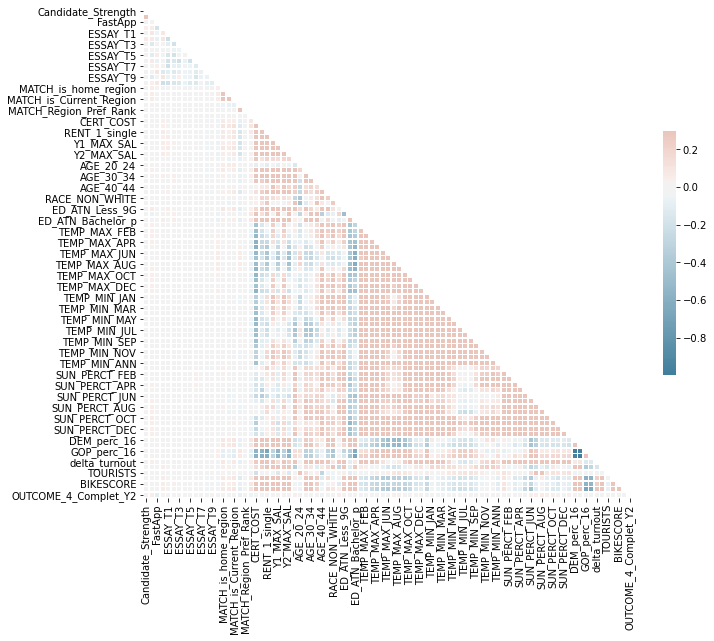

In [8]:
# Creating a general correlation matrix of overall dataframe (non-categorical)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_int_float_correlation, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_int_float_correlation, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [9]:
# selecting important features based on pearson correlation

cols_to_be_selected_non_categorical = []
all_cols = df_int_float_correlation.columns
index = 0;

for x in df_int_float_correlation['OUTCOME_4_Complet_Y2'].tolist():
    if(x >= -0.06 and x <=0.06):
        #neglecting the feature / column
        pass
    else:
        cols_to_be_selected_non_categorical.append(all_cols[index])
    index += 1
    
cols_to_be_selected_non_categorical

['Mission_KNWL_ALNMT',
 'FastApp',
 'MATCH_Region_Pref_Level',
 'OUTCOME_4_Complet_Y2']

## Manipulating Categorical Features

In [10]:
df_cat_cols = df[obj_cols]

df_cat_cols

MATCH_Subject Applicant_Pool UNIV_Selectivity  \
0             ARTS              A   Most Selective   
1             ARTS              A   More Selective   
2             ARTS              B        Selective   
3             ARTS              A        Selective   
4             ARTS              B  Least Selective   
...            ...            ...              ...   
9866          SPED              A  Least Selective   
9867          SPED              A   More Selective   
9868          SPED              A   More Selective   
9869          SPED              B   Less Selective   
9870          SPED              A   Most Selective   

                           UNIV_Major Low_IncomeComm_Ex Low_IncomeComm_Ex_L  \
0                          Government                 Y              LEVEL2   
1                          Film/Video                 Y              LEVEL3   
2                             Theater                 N              LEVEL1   
3                               Music                 Y              LEVEL1   
4                            Religion                 N              LEVEL3   
...                               ...               ...                 ...   
9866  International Studies/Relations                 Y              LEVEL3   
9867                   Communications                 Y              LEVEL3   
9868                        Sociology                 Y              LEVEL3   
9869                        Marketing                 Y              LEVEL3   
9870                      Art History                 Y              LEVEL3   

     Population_size SUBJECT_Teach_Mapping  
0         very small            Humanities  
1         very small            Humanities  
2           big city            Humanities  
3               city            Humanities  
4         very small            Humanities  
...              ...                   ...  
9866        big city             GeneralEd  
9867        big city             GeneralEd  
9868      very small             GeneralEd  
9869        big city             GeneralEd  
9870        big city             GeneralEd  

[9871 rows x 8 columns]

In [11]:
# using hot one encoding technique to convert all categorical values into non-categorical values.

def oneHotEncoding_with_names(columnName):
    
    temp_df = pd.get_dummies(df_cat_cols[columnName],drop_first=True)
    for x in temp_df.columns:
        temp_df.rename(columns={x:columnName+'_'+str(x)},inplace=True)
    
    for x in temp_df.columns:
        df_cat_cols[x] = temp_df[x]
    
    df_cat_cols.drop(labels=columnName,axis=1,inplace=True)
    return df_cat_cols

for y in df_cat_cols.columns:
    oneHotEncoding_with_names(y)

df_cat_cols['OUTCOME_4_Complet_Y2'] = df['OUTCOME_4_Complet_Y2']
df_cat_cols


C:\Users\S.M.Ammar\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


MATCH_Subject_BILINGUAL  MATCH_Subject_BIOLOGY  MATCH_Subject_CHEMISTRY  \
0                           0                      0                        0   
1                           0                      0                        0   
2                           0                      0                        0   
3                           0                      0                        0   
4                           0                      0                        0   
...                       ...                    ...                      ...   
9866                        0                      0                        0   
9867                        0                      0                        0   
9868                        0                      0                        0   
9869                        0                      0                        0   
9870                        0                      0                        0   

      MATCH_Subject_ELEMENTARY  MATCH_Subject_ENGLISH  MATCH_Subject_ESL  \
0                            0                      0                  0   
1                            0                      0                  0   
2                            0                      0                  0   
3                            0                      0                  0   
4                            0                      0                  0   
...                        ...                    ...                ...   
9866                         0                      0                  0   
9867                         0                      0                  0   
9868                         0                      0                  0   
9869                         0                      0                  0   
9870                         0                      0                  0   

      MATCH_Subject_FRENCH  MATCH_Subject_HISTORY  MATCH_Subject_HSGENSCIENCE  \
0                        0                      0                           0   
1                        0                      0                           0   
2                        0                      0                           0   
3                        0                      0                           0   
4                        0                      0                           0   
...                    ...                    ...                         ...   
9866                     0                      0                           0   
9867                     0                      0                           0   
9868                     0                      0                           0   
9869                     0                      0                           0   
9870                     0                      0                           0   

      MATCH_Subject_HSMATH  MATCH_Subject_MSGENERALIST  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   
...                    ...                         ...   
9866                     0                           0   
9867                     0                           0   
9868                     0                           0   
9869                     0                           0   
9870                     0                           0   

      MATCH_Subject_MSGENSCIENCE  MATCH_Subject_MSMATH  MATCH_Subject_MUSIC  \
0                              0                     0                    0   
1                              0                     0                    0   
2                              0                     0                    0   
3                              0                     0                    0   
4                              0                     0 

In [12]:
# Pearson correlation matrix
df_cat_cols_correlation = df_cat_cols.corr()
df_cat_cols_correlation

MATCH_Subject_BILINGUAL  \
MATCH_Subject_BILINGUAL                                            1.000000   
MATCH_Subject_BIOLOGY                                             -0.026480   
MATCH_Subject_CHEMISTRY                                           -0.019411   
MATCH_Subject_ELEMENTARY                                          -0.078289   
MATCH_Subject_ENGLISH                                             -0.051697   
MATCH_Subject_ESL                                                 -0.020715   
MATCH_Subject_FRENCH                                              -0.002456   
MATCH_Subject_HISTORY                                             -0.028831   
MATCH_Subject_HSGENSCIENCE                                        -0.041398   
MATCH_Subject_HSMATH                                              -0.044282   
MATCH_Subject_MSGENERALIST                                        -0.028259   
MATCH_Subject_MSGENSCIENCE                                        -0.029282   
MATCH_Subject_MSMATH                                              -0.028831   
MATCH_Subject_MUSIC                                               -0.002836   
MATCH_Subject_PHYSICS                                             -0.008157   
MATCH_Subject_PREK                                                -0.026398   
MATCH_Subject_SPANISH                                             -0.019411   
MATCH_Subject_SPED                                                -0.062477   
Applicant_Pool_B                                                  -0.004426   
UNIV_Selectivity_Less Selective                                   -0.006886   
UNIV_Selectivity_More Selective                                   -0.014967   
UNIV_Selectivity_More selective                                   -0.003473   
UNIV_Selectivity_Most Selective                                   -0.009365   
UNIV_Selectivity_Selective                                        -0.004242   
UNIV_Major_Advertising                                            -0.005495   
UNIV_Major_Aerospace Engineering                                  -0.002005   
UNIV_Major_African Studies                                        -0.004255   
UNIV_Major_African-American Studies                                0.014110   
UNIV_Major_Agricultural Science                                   -0.005495   
UNIV_Major_American Studies                                       -0.008984   
UNIV_Major_Animal Science                                          0.017282   
UNIV_Major_Anthropology                                           -0.012788   
UNIV_Major_Archaeology                                            -0.002456   
UNIV_Major_Architecture                                           -0.003473   
UNIV_Major_Art                                                    -0.007905   
UNIV_Major_Art Education                                          -0.002836   
UNIV_Major_Art History                                             0.005908   
UNIV_Major_Asian American Studies                                 -0.001418   
UNIV_Major_Asian Studies                                          -0.004255   
UNIV_Major_Athletic Training                                      -0.001418   
UNIV_Major_Behavioral Science                                     -0.004011   
UNIV_Major_Biblical Studies                                       -0.002005   
UNIV_Major_Biochemistry                                           -0.011643   
UNIV_Major_Biology                                                -0.021690   
UNIV_Major_Biomedical Engineering                                 -0.008032   
UNIV_Major_Biophysics                                             -0.001418   
UNIV_Major_Biopsychology                                          -0.004704   
UNIV_Major_Botany                                                 -0.002005   
UNIV_Major_Business                                               -0.013878   
UNIV_Major_Chemical Engineering                                   -0.006953   
UNIV_Major_Chemistry   

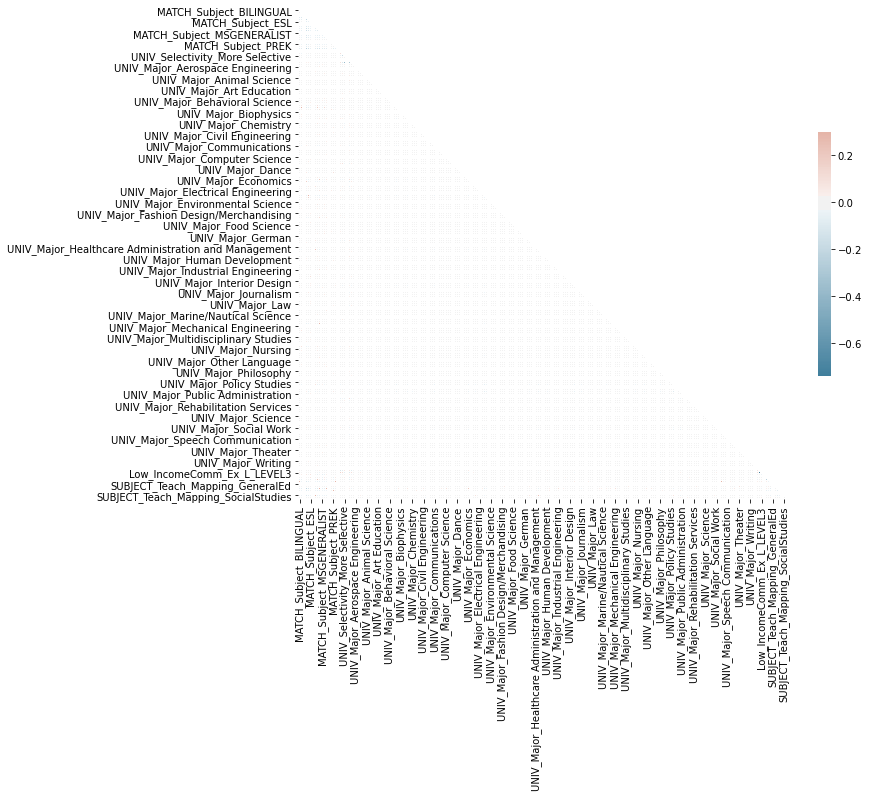

In [13]:
# Creating a general correlation matrix of overall dataframe (categorical)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_cat_cols_correlation, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_cat_cols_correlation, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
# selecting important features based on pearson correlation

cols_to_be_selected_categorical = []
all_cols = df_cat_cols_correlation.columns
index = 0;

for x in df_cat_cols_correlation['OUTCOME_4_Complet_Y2'].tolist():
    if(x >= -0.03 and x <=0.03):
        #neglecting the feature / column
        pass
    else:
        cols_to_be_selected_categorical.append(all_cols[index])
    index += 1
    
cols_to_be_selected_categorical

['UNIV_Major_Classics',
 'UNIV_Major_Exercise Science',
 'UNIV_Major_Finance',
 'Low_IncomeComm_Ex_L_LEVEL3',
 'SUBJECT_Teach_Mapping_ForeignLanguage',
 'OUTCOME_4_Complet_Y2']

# Building Final Dataframe

In [15]:
final_df = pd.DataFrame()
final_df['Mission_KNWL_ALNMT'] = df['Mission_KNWL_ALNMT']
final_df['MATCH_Region_Pref_Level'] = df['MATCH_Region_Pref_Level']
final_df['FastApp'] = df['FastApp']
final_df['UNIV_Major_Classics'] = df_cat_cols['UNIV_Major_Classics']
final_df['UNIV_Major_Exercise Science'] = df_cat_cols['UNIV_Major_Exercise Science']
final_df['UNIV_Major_Finance'] = df_cat_cols['UNIV_Major_Finance']
final_df['Low_IncomeComm_Ex_L_LEVEL3'] = df_cat_cols['Low_IncomeComm_Ex_L_LEVEL3']
final_df['SUBJECT_Teach_Mapping_ForeignLanguage'] = df_cat_cols['SUBJECT_Teach_Mapping_ForeignLanguage']
final_df['OUTCOME_4_Complet_Y2'] = df_cat_cols['OUTCOME_4_Complet_Y2']

final_df



Mission_KNWL_ALNMT  MATCH_Region_Pref_Level  FastApp  \
0                    4.0                        1        0   
1                    3.0                        1        0   
2                    3.0                        1        0   
3                    3.0                        1        0   
4                    4.0                        1        0   
...                  ...                      ...      ...   
9866                 4.0                        1        0   
9867                 4.0                        1        0   
9868                 5.0                        1        1   
9869                 4.0                        1        0   
9870                 4.0                        1        0   

      UNIV_Major_Classics  UNIV_Major_Exercise Science  UNIV_Major_Finance  \
0                       0                            0                   0   
1                       0                            0                   0   
2                       0                            0                   0   
3                       0                            0                   0   
4                       0                            0                   0   
...                   ...                          ...                 ...   
9866                    0                            0                   0   
9867                    0                            0                   0   
9868                    0                            0                   0   
9869                    0                            0                   0   
9870                    0                            0                   0   

      Low_IncomeComm_Ex_L_LEVEL3  SUBJECT_Teach_Mapping_ForeignLanguage  \
0                              0                                      0   
1                              1                                      0   
2                              0                                      0   
3                              0                                      0   
4                              1                                      0   
...                          ...                                    ...   
9866                           1                                      0   
9867                           1                                      0   
9868                           1                                      0   
9869                           1                                      0   
9870                           1                                      0   

      OUTCOME_4_Complet_Y2  
0                        0  
1                        1  
2                        1  
3                        0  
4                        1  
...                    ...  
9866                     1  
9867                     1  
9868                     0  
9869                     1  
9870                     0  

[9871 rows x 9 columns]

In [16]:
# creating features and targets
features = final_df[['MATCH_Region_Pref_Level','Mission_KNWL_ALNMT','FastApp','UNIV_Major_Classics','UNIV_Major_Exercise Science','UNIV_Major_Finance','Low_IncomeComm_Ex_L_LEVEL3','SUBJECT_Teach_Mapping_ForeignLanguage']]
target = final_df[['OUTCOME_4_Complet_Y2']]


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
rfc = RandomForestClassifier(n_estimators=200)
rfc_model = cross_validate(rfc,features,target,cv=100,return_estimator=True)
rfc_model

C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\S.M.Ammar\AppData\Loca

C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\S.M.Ammar\AppData\Loca

C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\S.M.Ammar\AppData\Loca

C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\S.M.Ammar\AppData\Loca

{'estimator': (RandomForestClassifier(n_estimators=200),
  RandomForestClassifier(n_estimators=200),
  RandomForestClassifier(n_estimators=200),
  RandomForestClassifier(n_estimators=200),
  RandomForestClassifier(n_estimators=200),
  RandomForestClassifier(n_estimators=200),
  RandomForestClassifier(n_estimators=200),
  RandomForestClassifier(n_estimators=200),
  RandomForestClassifier(n_estimators=200),
  RandomForestClassifier(n_estimators=200),
  RandomForestClassifier(n_estimators=200),
  RandomForestClassifier(n_estimators=200),
  RandomForestClassifier(n_estimators=200),
  RandomForestClassifier(n_estimators=200),
  RandomForestClassifier(n_estimators=200),
  RandomForestClassifier(n_estimators=200),
  RandomForestClassifier(n_estimators=200),
  RandomForestClassifier(n_estimators=200),
  RandomForestClassifier(n_estimators=200),
  RandomForestClassifier(n_estimators=200),
  RandomForestClassifier(n_estimators=200),
  RandomForestClassifier(n_estimators=200),
  RandomForestClass

In [18]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr_model = cross_validate(lgr,features,target,cv=50,return_estimator=True)
lgr_model

C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vecto

C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vecto

{'estimator': (LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  L

In [22]:
# saving prediction model with accury 64%

final_model = rfc_model['estimator'][7]
print(rfc_model['test_score'][7])
import pickle
with open('OUTCOME_4_Complete_Y2.pkl', 'wb') as fid:
    pickle.dump(final_model, fid)

0.6464646464646465
